In [3]:
import pandas as pd

# โหลดข้อมูล
df = pd.read_excel("stock_test2.xlsx")

# ตั้งชื่อคอลัมน์ใหม่
df.columns = [
    "วันที่", "ราคาเปิด", "ราคาสูงสุด", "ราคาต ่าสุด", "ราคาเฉลี่ย", "ราคาปิด",
    "เปลี่ยนแปลง", "เปลี่ยนแปลง(%)", "ปริมาณ(พันหุ้น)", "มูลค่า(ล้านบาท)",
    
    "SET Index", "SET เปลี่ยนแปลง(%)"
]

# ฟังก์ชันแปลงวันที่ไทย
thai_months = {
    "ม.ค.": "01", "ก.พ.": "02", "มี.ค.": "03", "เม.ย.": "04",
    "พ.ค.": "05", "มิ.ย.": "06", "ก.ค.": "07", "ส.ค.": "08",
    "ก.ย.": "09", "ต.ค.": "10", "พ.ย.": "11", "ธ.ค.": "12"
}

def convert_thai_date(thai_date_str):
    for th, num in thai_months.items():
        if th in thai_date_str:
            day, month_th, year_th = thai_date_str.replace(",", "").split()
            month = thai_months[month_th]
            year = int(year_th) - 543
            return f"{year}-{month}-{int(day):02d}"
    return None

# แปลงวันที่ + ลบ row ที่ไม่ใช่ข้อมูล
df = df[~df["วันที่"].isna() & ~df["วันที่"].astype(str).str.contains("วันที่")]
df["วันที่"] = df["วันที่"].apply(convert_thai_date)
df["วันที่"] = pd.to_datetime(df["วันที่"])
df = df.dropna()

# ตั้ง index ให้เริ่มที่ 1
df.index = range(1, len(df) + 1)

# แสดงผล
df.head(5)

,วันที่,ราคาเปิด,ราคาสูงสุด,ราคาต ่าสุด,ราคาเฉลี่ย,ราคาปิด,เปลี่ยนแปลง,เปลี่ยนแปลง(%),ปริมาณ(พันหุ้น),มูลค่า(ล้านบาท),SET Index,SET เปลี่ยนแปลง(%)
1,2025-05-16,31.00,31.25,30.75,31.07,31.25,0.25,0.81,30931.71,961.04,1195.77,0.11
2,2025-05-15,31.25,31.25,30.75,31.03,31.00,-0.25,-0.80,49854.78,1546.98,1194.49,-1.83
3,2025-05-14,31.00,31.25,31.00,31.06,31.25,0.25,0.81,36747.19,1141.53,1216.71,0.19
4,2025-05-13,31.25,31.75,31.00,31.38,31.00,-0.25,-0.80,81913.72,2570.39,1214.39,0.28
5,2025-05-09,31.25,31.25,30.75,31.12,31.25,0.25,0.81,29802.75,927.57,1210.94,0.36


In [4]:
print(df["ราคาปิด"].describe())
print(df[df["ราคาปิด"] == df["ราคาปิด"].max()])
print(df[["ราคาปิด", "SET Index"]].corr())

count    109.000000
mean      31.100917
std        1.002381
min       27.250000
25%       30.750000
50%       31.250000
75%       31.750000
max       32.500000
Name: ราคาปิด, dtype: float64
       วันที่  ราคาเปิด  ราคาสูงสุด  ราคาต ่าสุด  ราคาเฉลี่ย  ราคาปิด  \
31 2025-03-27     32.50       32.75        32.25       32.51     32.5   
32 2025-03-26     32.50       32.75        32.25       32.46     32.5   
33 2025-03-25     32.25       32.50        32.00       32.31     32.5   
99 2024-12-18     32.25       32.50        32.00       32.37     32.5   

    เปลี่ยนแปลง  เปลี่ยนแปลง(%)  ปริมาณ(พันหุ้น)  มูลค่า(ล้านบาท)  SET Index  \
31         0.00            0.00         29593.47           962.03    1187.90   
32         0.00            0.00         30970.73          1005.19    1190.36   
33         0.25            0.78         55022.62          1777.92    1184.93   
99         0.25            0.78         29187.63           944.71    1398.95   

    SET เปลี่ยนแปลง(%)  
31               -

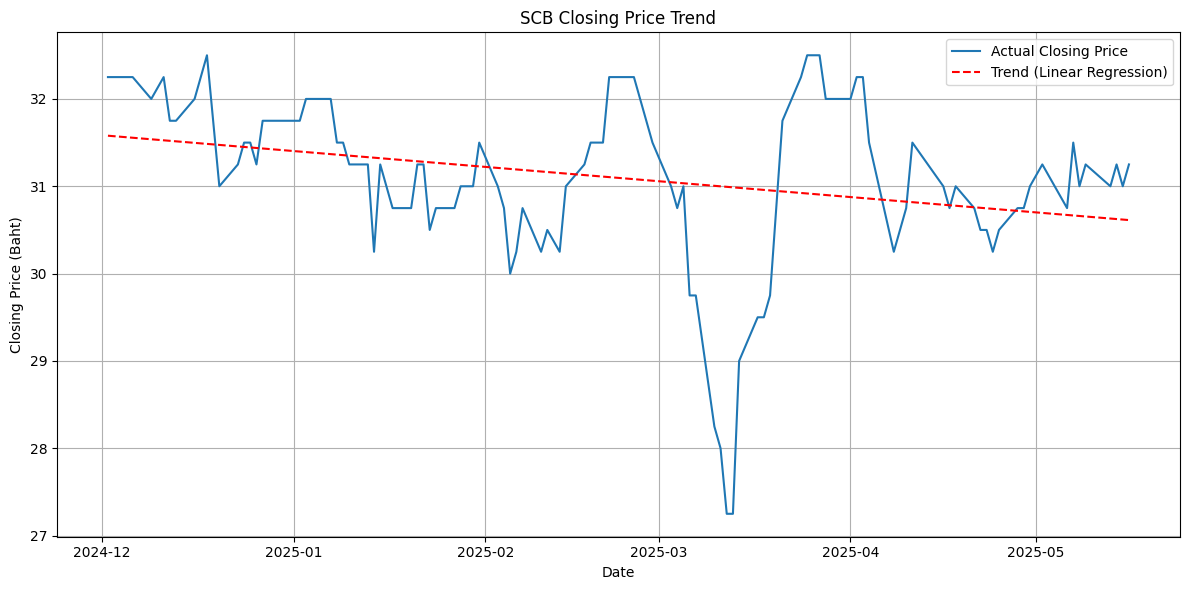

In [7]:
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['font.family'] = 'DejaVu Sans'
df_sorted = df.sort_values("วันที่")
X = df_sorted["วันที่"].map(pd.Timestamp.toordinal).values.reshape(-1, 1)
y = df_sorted["ราคาปิด"].values
model = LinearRegression()
model.fit(X, y)
trend = model.predict(X)
plt.figure(figsize=(12, 6))
plt.plot(df_sorted["วันที่"], y, label="Actual Closing Price")
plt.plot(df_sorted["วันที่"], trend, label="Trend (Linear Regression)",
linestyle="--", color="red")
plt.title("SCB Closing Price Trend")
plt.xlabel("Date")
plt.ylabel("Closing Price (Baht)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()